## Capstone Project: HealthCare

#### Ankit Parashar

### Problem Statement

* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.  
* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.  
* Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

* **`Variables`**  	Description  
* **`Pregnancies`**	Number of times pregnant  
* **`Glucose`**	Plasma glucose concentration in an oral glucose tolerance test  
* **`BloodPressure`**	Diastolic blood pressure (mm Hg)  
* **`SkinThickness`**	Triceps skinfold thickness (mm)  
* **`Insulin`**	Two hour serum insulin  
* **`BMI`**	Body Mass Index  
* **`DiabetesPedigreeFunction`**	Diabetes pedigree function  
* **`Age`**	Age in years  
* **`Outcome`**	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0  

### Project Task: Week 1

#### Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:  

• **Glucose**  

• **BloodPressure**  

• **SkinThickness**  

• **Insulin**  

• **BMI**  

2. Visually explore these variables using histograms. Treat the missing values accordingly.  

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.   



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df_diabetes = pd.read_csv('health care diabetes.csv')

In [3]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_diabetes.shape

(768, 9)

In [7]:
df_diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There is 768 observations of 9 variable. Independent variables are **`Pregnencies , Glucose, BloodPressure, Insulin, BMI and DiabetesPedigree Function`**. **`Age`** is Outcome Variable. Average Age of Patients are 33.24 with minimum being 21 and maximum 81. Avg. value of independent variables are Preg = 3.845052,Glucose = 120.894531, BP = 69.105469, ST=20.536458, Insulin = 79.799479, BMI = 31.992578 DPF = 0.471876 . Variation in variables can be easily observed from table below:

In [8]:
print("Standard Deviation of each variables are")
df_diabetes.apply(np.std)

Standard Deviation of each variables are


Pregnancies                   3.367384
Glucose                      31.951796
BloodPressure                19.343202
SkinThickness                15.941829
Insulin                     115.168949
BMI                           7.879026
DiabetesPedigreeFunction      0.331113
Age                          11.752573
Outcome                       0.476641
dtype: float64

In [9]:
### Check for null values
df_diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

No null values in the dataframe, but from head and tail we can observe that value of 0 for Glucose
BloodPressure, SkinThickness, Insulin, BMI whihc does not make any sense. We will analyse and impute it later.

As mentioned above, the variables **`Glucose`**, **`BloodPressure`**, **`SkinThickness`**, **`Insulin`** and **`BMI`** have minimum value as 0 which does not make sense here. We will now visualize them using Histograms and other tools to come up with a strategy for replacing zero values.

In [10]:
diabetic = df_diabetes[df_diabetes['Outcome']==1]
diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [11]:
diabetic.shape

(268, 9)

In [12]:
non_diabetic = df_diabetes[df_diabetes['Outcome']==0]
non_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [13]:
non_diabetic.shape

(500, 9)

From above analysis we can see that we have **`268`** observations for **`diabetic`** whereas **`500`** observation
for **`non-diabetic`** patient

In [14]:
df_diabetes['Glucose'].value_counts().head(10)

100    17
99     17
129    14
125    14
111    14
106    14
95     13
108    13
105    13
102    13
Name: Glucose, dtype: int64

### Visually explore these variables using histograms. Treat the missing values accordingly:

Mean of Glucose level is : 120.89453125
Datatype of Glucose Variable is: int64


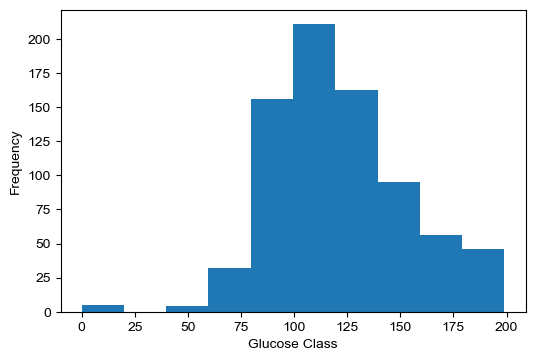

In [15]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Glucose Class')
df_diabetes['Glucose'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of Glucose level is :", df_diabetes['Glucose'].mean())
print("Datatype of Glucose Variable is:",df_diabetes['Glucose'].dtypes)

**The Glucose data seems to be slightly left skewed. This can be attributed to the fact that the data points may be slightly more for data without diabetes.**  
From above Histogram we can observe that most of the values fall between the range of 100 to 120. So I will use 
mean of glucose level to treat the missing values which in this case is represented by value 0 (zero).

#### Treating missing values for Glucose Level

In [16]:
df_diabetes['Glucose']=df_diabetes['Glucose'].replace(0,df_diabetes['Glucose'].mean())

In [17]:
df_diabetes['BloodPressure'].value_counts().head(10)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
76    39
60    37
0     35
Name: BloodPressure, dtype: int64

Mean of BloodPressure level is : 69.10546875
Datatype of BloodPressure Variable is: int64


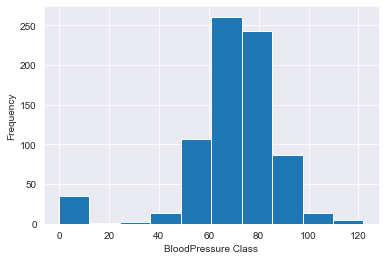

In [18]:
plt.xlabel('BloodPressure Class')
df_diabetes['BloodPressure'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of BloodPressure level is :", df_diabetes['BloodPressure'].mean())
print("Datatype of BloodPressure Variable is:",df_diabetes['BloodPressure'].dtypes)

**The Blood Pressure data seems to be more or less normally distributed. Leaving aside the zero values which are invalid for this parameter.**  
From above Histogram we can see that most of the observations for Blood Pressure level falls between 70 to 80
and the mean of Blood Pressure level is 69.10, so I will use mean values to impute missing values which in our
case is represented by 0 (zero).

#### Treating missing values for Blood Pressure Level

In [19]:
df_diabetes['BloodPressure']=df_diabetes['BloodPressure'].replace(0,df_diabetes['BloodPressure'].mean())

In [20]:
df_diabetes['SkinThickness'].value_counts().head(10)

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
Name: SkinThickness, dtype: int64

Mean of SkinThickness is : 20.536458333333332
Datatype of SkinThickness Variable is: int64


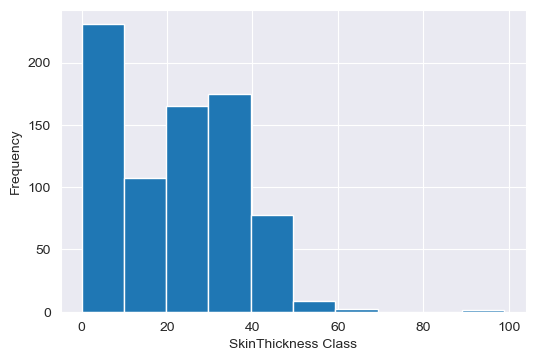

In [21]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('SkinThickness Class')
df_diabetes['SkinThickness'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of SkinThickness is :", df_diabetes['SkinThickness'].mean())
print("Datatype of SkinThickness Variable is:",df_diabetes['SkinThickness'].dtypes)

**There are considerable number of zero values for SkinThickness variable as well.**  
From above Histogram we can see that most of the observations for Skin Thickness falls between 20 to 40
and the mean of Skin Thickness is 20.53, so I will use mean values to impute missing values which in our
case is represented by 0 (zero).

#### Treating missing values for Skin Thickness

In [22]:
df_diabetes['SkinThickness']=df_diabetes['SkinThickness'].replace(0,df_diabetes['SkinThickness'].mean())

In [23]:
df_diabetes['Insulin'].value_counts().head(10)

0      374
105     11
140      9
130      9
120      8
100      7
94       7
180      7
110      6
115      6
Name: Insulin, dtype: int64

Mean of Insulin is : 79.79947916666667
Datatype of Insulin Variable is: int64


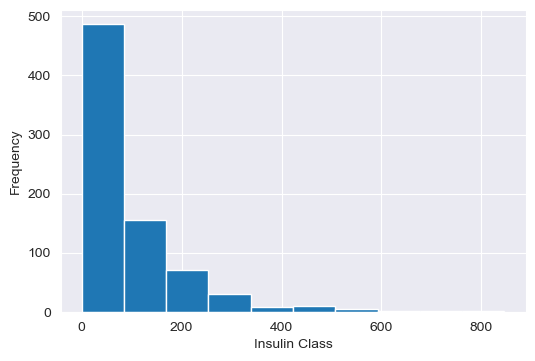

In [24]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Insulin Class')
df_diabetes['Insulin'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of Insulin is :", df_diabetes['Insulin'].mean())
print("Datatype of Insulin Variable is:",df_diabetes['Insulin'].dtypes)

**There are significant zero records in Insulin variable. There are also some outlier values greater than 800.**

#### Treating missing values for Insulin level

In [25]:
df_diabetes['Insulin']=df_diabetes['Insulin'].replace(0,df_diabetes['Insulin'].mean())

In [26]:
df_diabetes['BMI'].value_counts().head(10)

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
30.8     9
32.9     9
30.1     9
Name: BMI, dtype: int64

Mean of BMI is : 31.992578124999977
Datatype of BMI Variable is: float64


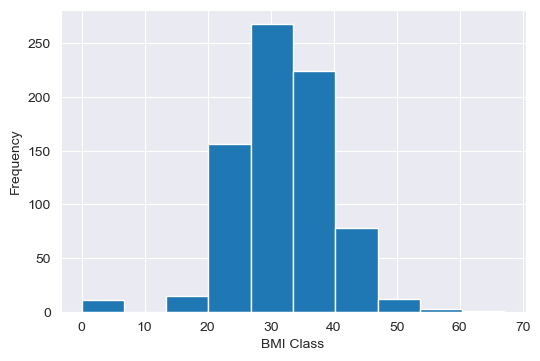

In [27]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BMI Class')
df_diabetes['BMI'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of BMI is :", df_diabetes['BMI'].mean())
print("Datatype of BMI Variable is:",df_diabetes['BMI'].dtypes)

**The BMI data is normal with slight right skew. Again there are zero values which will have to be treated.**  
From above Histogram we can see that most of the observations for BMI level falls between 30 to 40
and the mean of BMI is 31.99, so I will use mean values to impute missing values which in our
case is represented by 0 (zero).

#### Treating missing values for BMI level

In [28]:
df_diabetes['BMI']=df_diabetes['BMI'].replace(0,df_diabetes['BMI'].mean())

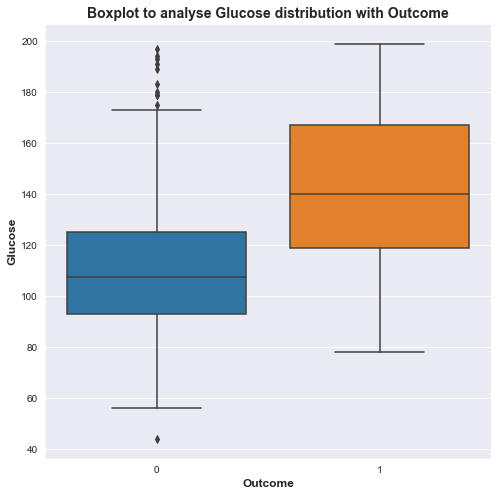

In [29]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Outcome', y = 'Glucose', data = df_diabetes[df_diabetes['Glucose'] != 0])
plt.xlabel('Outcome', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Glucose', fontsize = 12, fontweight = 'semibold')
plt.title('Boxplot to analyse Glucose distribution with Outcome', fontsize = 14, fontweight = 'semibold');

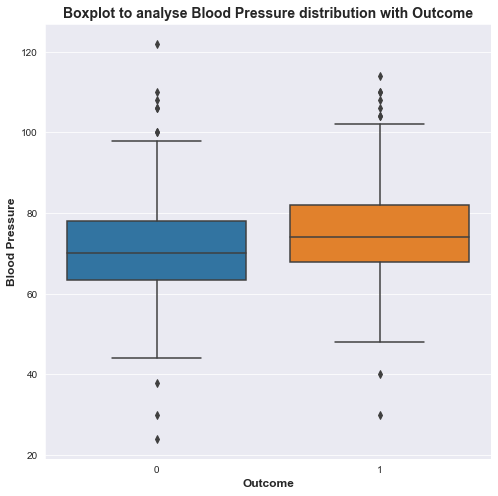

In [30]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Outcome', y = 'BloodPressure', data = df_diabetes[df_diabetes['BloodPressure'] != 0])
plt.xlabel('Outcome', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Blood Pressure', fontsize = 12, fontweight = 'semibold')
plt.title('Boxplot to analyse Blood Pressure distribution with Outcome', fontsize = 14, fontweight = 'semibold');

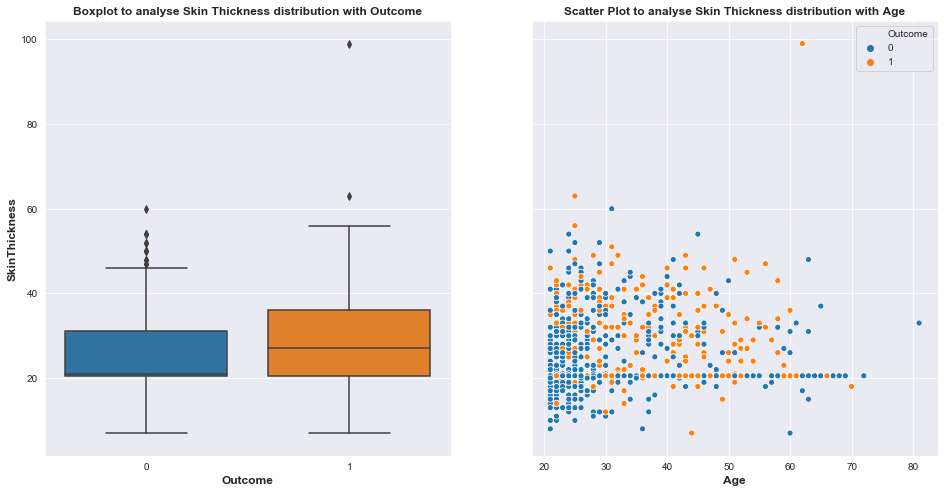

In [31]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8), sharey = True)
axes[0].set_title('Boxplot to analyse Skin Thickness distribution with Outcome', fontsize = 12, fontweight = 'semibold')
axes[0].set_xlabel('Outcome', fontsize = 12, fontweight = 'semibold')
axes[0].set_ylabel('Skin Thickness', fontsize = 12, fontweight = 'semibold')
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = df_diabetes[df_diabetes['SkinThickness'] != 0], ax = axes[0])
axes[1].set_title('Scatter Plot to analyse Skin Thickness distribution with Age', fontsize = 12, fontweight = 'semibold')
axes[1].set_xlabel('Age', fontsize = 12, fontweight = 'semibold')
sns.scatterplot(x = 'Age', y = 'SkinThickness', data = df_diabetes[df_diabetes['SkinThickness'] != 0], hue = 'Outcome', ax = axes[1]);

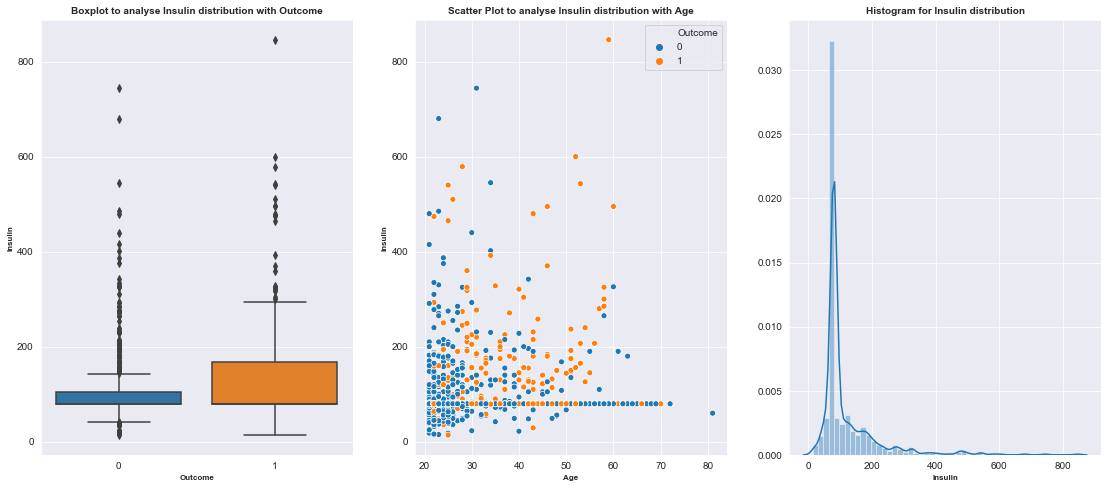

In [32]:
fig, axes = plt.subplots(1, 3, figsize = (19, 8))
axes[0].set_title('Boxplot to analyse Insulin distribution with Outcome', fontsize = 10, fontweight = 'semibold')
axes[0].set_xlabel('Outcome', fontsize = 8, fontweight = 'semibold')
axes[0].set_ylabel('Insulin', fontsize = 8, fontweight = 'semibold')
sns.boxplot(x='Outcome', y = 'Insulin', data = df_diabetes, ax = axes[0])
axes[1].set_title('Scatter Plot to analyse Insulin distribution with Age', fontsize = 10, fontweight = 'semibold')
axes[1].set_xlabel('Age', fontsize = 8, fontweight = 'semibold')
axes[1].set_ylabel('Insulin', fontsize = 8, fontweight = 'semibold')
sns.scatterplot(x = 'Age', y = 'Insulin', data = df_diabetes, hue = 'Outcome', ax = axes[1])
axes[2].set_title('Histogram for Insulin distribution', fontsize = 10, fontweight = 'semibold')
axes[2].set_xlabel('Insulin', fontsize = 8, fontweight = 'semibold')
sns.distplot(df_diabetes['Insulin'], hist = True, kde = True, bins = 50, ax = axes[2]);

We can see that the value 0 for Insulin is present for a lot of records. 
Also, since the value to be replaced for Insulin is still inconclusive with the plots above, we will analyse this further

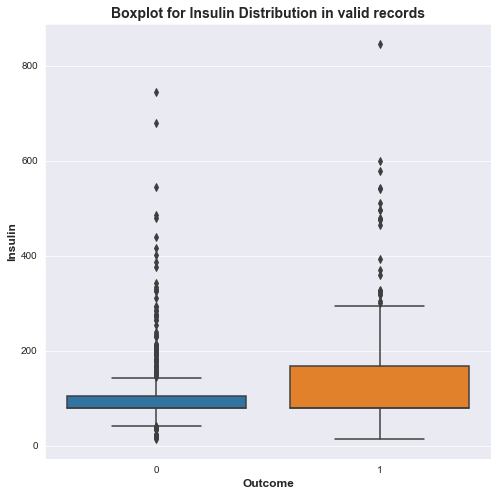

In [33]:
plt.figure(figsize=(8, 8))
plt.title('Boxplot for Insulin Distribution in valid records', fontsize = 14, fontweight = 'semibold')
plt.xlabel('Outcome', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Insulin', fontsize = 12, fontweight = 'semibold')
sns.boxplot(y = 'Insulin', x = 'Outcome', data = df_diabetes[df_diabetes['Insulin'] != 0]);

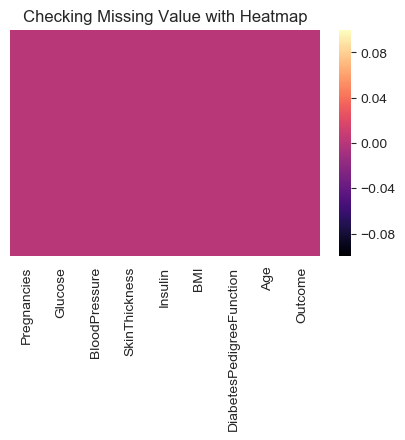

In [34]:
plt.figure(figsize=(5,3),dpi=100)
plt.title('Checking Missing Value with Heatmap')
sns.heatmap(df_diabetes.isnull(),cmap='magma',yticklabels=False)

Below mentioned is our strategy to deal with missing values which are **0** in this dataset:
1. **`Glucose`**: We are going to replace the values for records with mean values to impute as described above.
2. **`BloodPressure`**: We are going to replace the values for records wwith mean values to impute as described above.
3. **`SkinThickness`**: Since the plotsfor SkinThickness vs Age and Outcome, which are supposedly the primary factors for this are inconclusive, we will consider the mean value of SkinThickness for replacement.
4. **`Insulin`**: There are a lot of records in the dataset with **0** value for insulin. For replacement we will consider mean values for the records.
5. **`BMI`**: We will consider the mean BMI value for replacement.

In [35]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [36]:
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


From dataset head and tail we can infer that missing values have been treated now with their respective mean values

In [37]:
df_diabetes.to_csv('CleanDiabetesDataset.csv',index=False)

### Project Task: Week 2

#### Data Exploration:

**`1`**. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

**`2`**. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

**`3`**. Perform correlation analysis. Visually explore it using a heat map.

### Countplot for Outcomes

Count of class is:
 0    500
1    268
Name: Outcome, dtype: int64


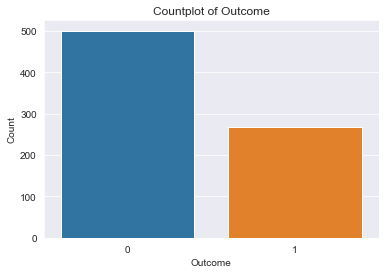

In [38]:
sns.set_style('darkgrid')
sns.countplot(df_diabetes['Outcome'])
plt.title("Countplot of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is:\n",df_diabetes['Outcome'].value_counts())

### Scatter Chart between Variables

Text(0.5, 1, 'Scatter plot between variables')

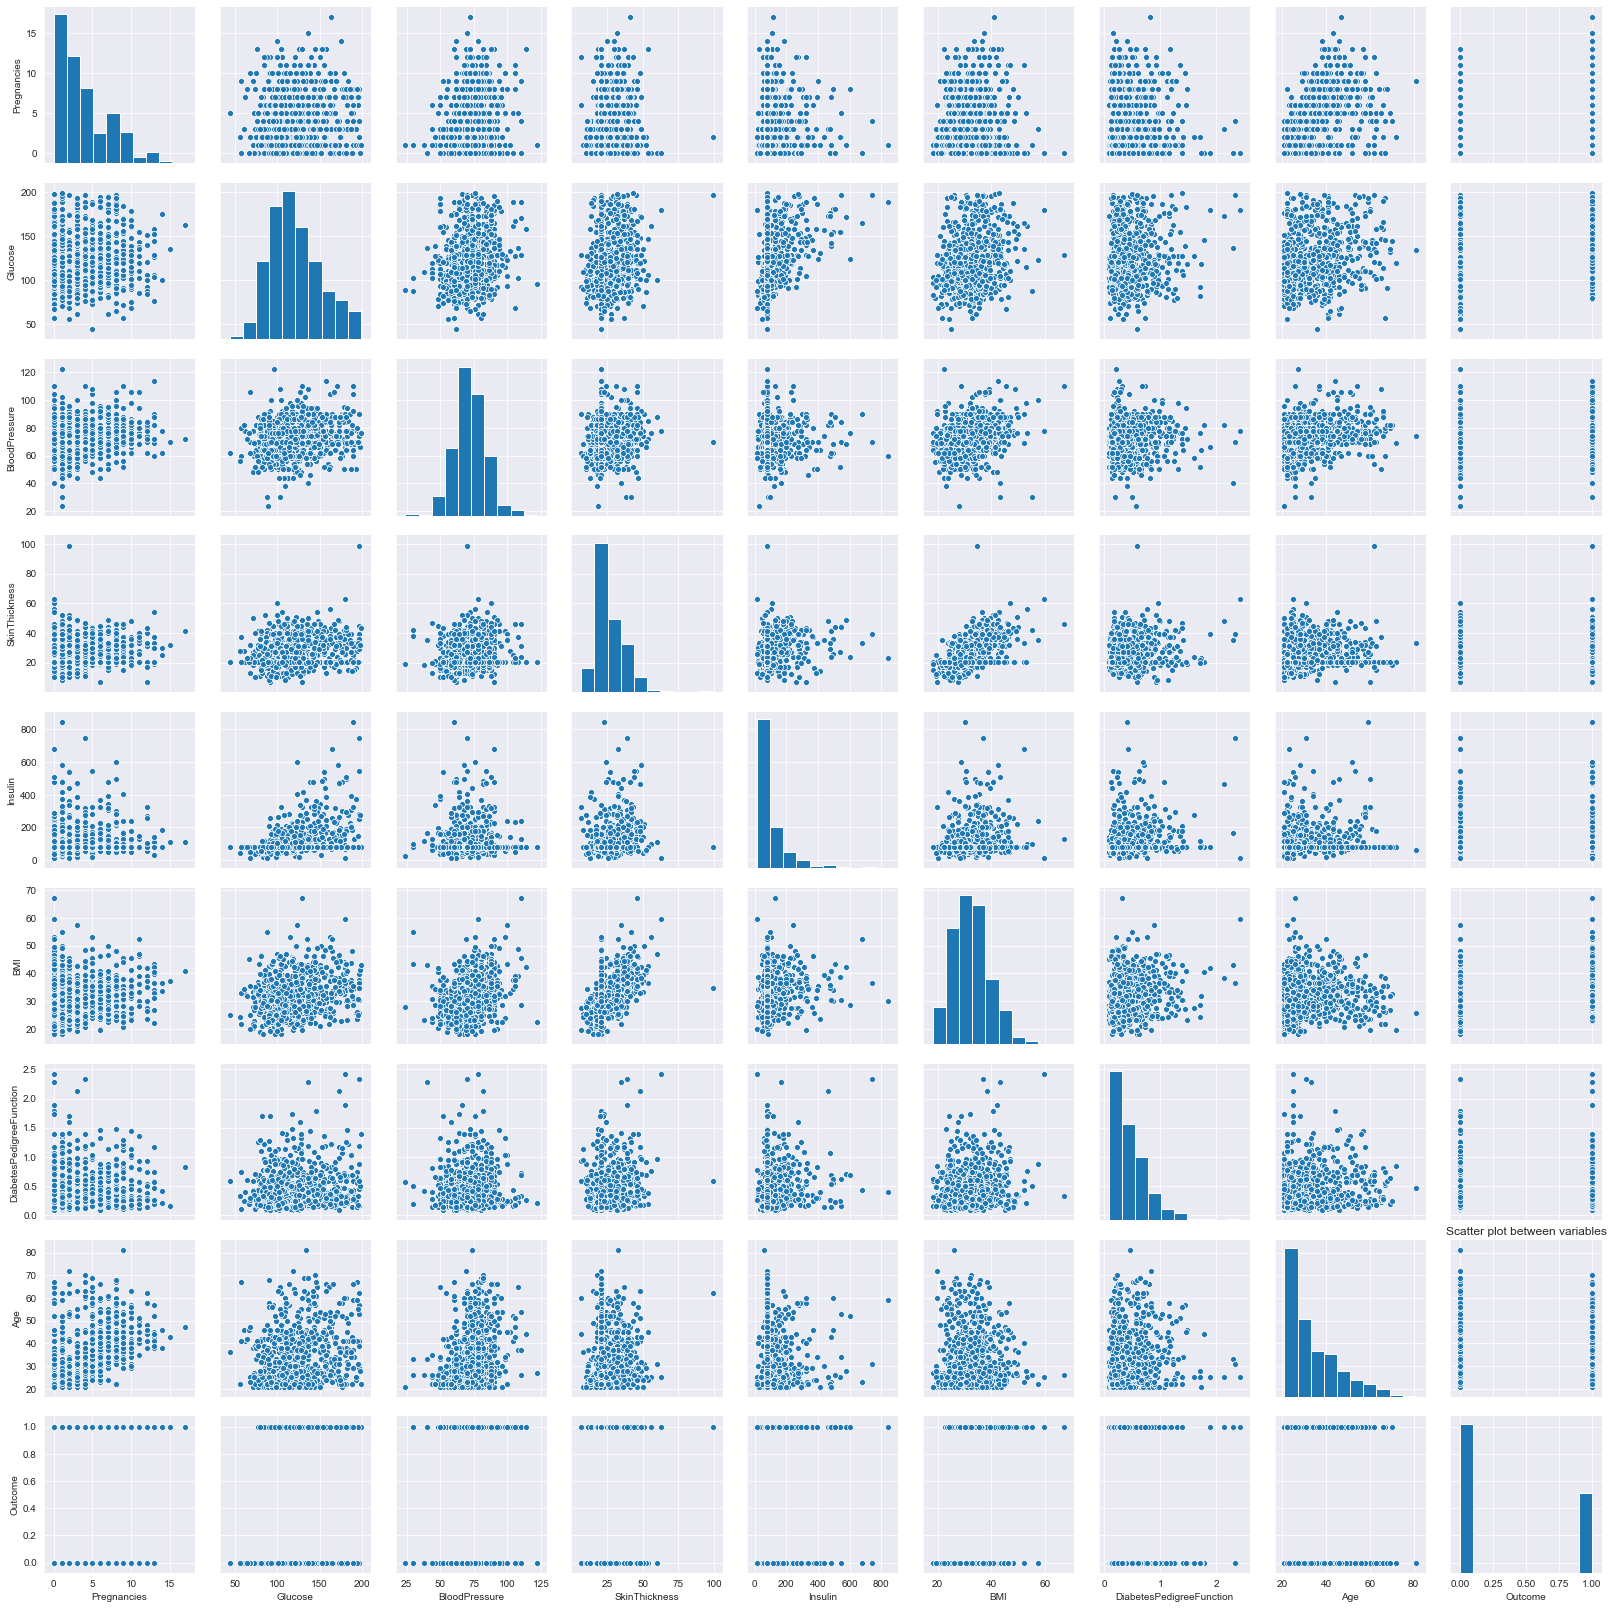

In [39]:
sns.pairplot(df_diabetes)
plt.title('Scatter plot between variables')

We can see from scatter plot that there is no strong multicolinearity among features, but between skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation. We will explore it further in correlation part.

#### Scatter Plot between variables

In [40]:
BloodPressure = df_diabetes['BloodPressure']
Glucose = df_diabetes['Glucose']
SkinThickness = df_diabetes['SkinThickness']
Insulin = df_diabetes['Insulin']
BMI = df_diabetes['BMI']

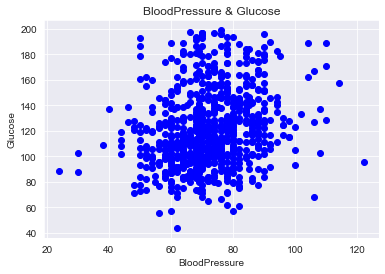

In [41]:
plt.scatter(BloodPressure, Glucose, color=['b'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose')
plt.show()

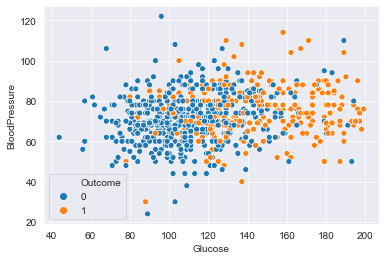

In [42]:
g =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=df_diabetes);

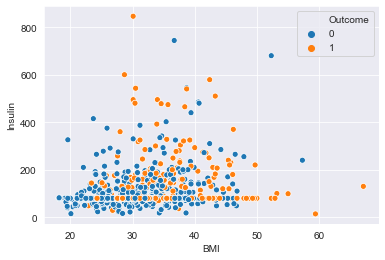

In [43]:
sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=df_diabetes);

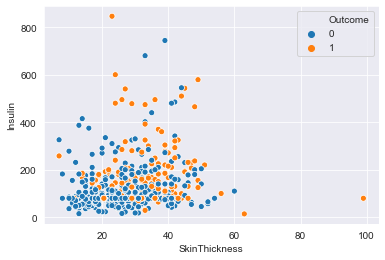

In [44]:
sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=df_diabetes);

### Correlation Analysis

In [45]:
df_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


From above results we can clearly see that Glucose and BMI has good impact on outcome. There is a strong positive correlation between BMI and Skinthickness or Pregnancies and age.

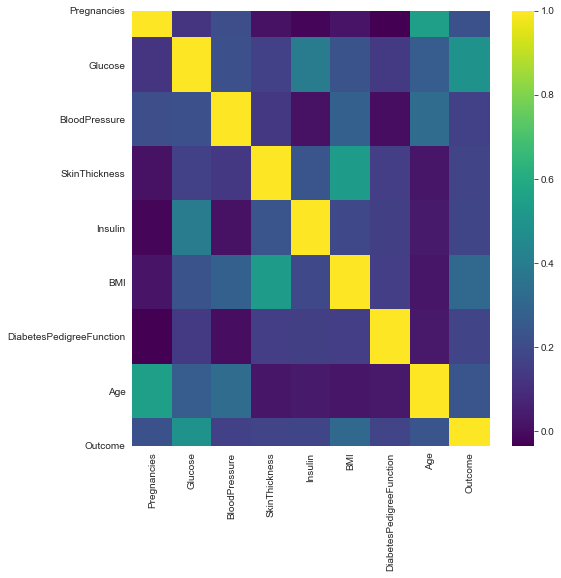

In [46]:
plt.subplots(figsize=(8,8))
sns.heatmap(df_diabetes.corr(),cmap='viridis')

### Project Task: Week 3

#### Data Modeling:

**`1`**. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

**`2`**. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Our data has two outcomes which makes it suitable for models like **`Logistic Regression`**, **`SVM`** and **`Decision Tree`**. To improve the model performance we can make use of `Hyper-parameter tuning in SVM` and **`Ensebmle modelling`** in **`Decision trees`** with **`Random Forest`** classifier. We will start fitting our data to these models using the mentioned approach since we have a relatively small data set to work with. With different modelling techniques, it will be easier for us to zero in on a good model for this data.

In [47]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


### Data Preprocessing

In [48]:
features = df_diabetes.iloc[:,[0,1,2,3,4,5,6,7]].values
label = df_diabetes.iloc[:,8].values

In [49]:
x=df_diabetes.iloc[:,:-1].values
y=df_diabetes.iloc[:,-1].values

In [50]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [51]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [54]:
Scale=StandardScaler()
x_train_std=Scale.fit_transform(x_train)
x_test_std=Scale.transform(x_test)

In [55]:
norm=lambda a:(a-min(a))/(max(a)-min(a))

In [56]:
df_norm=df_diabetes.iloc[:,:-1]

In [57]:
df_normalized=df_norm.apply(norm)

In [58]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(df_normalized.values,y,test_size=0.20,
                                                                   random_state=0)

In [59]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(614, 8)
(154, 8)
(614,)
(154,)


### KNN with Standard Scaling

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Importing required modules for performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_model = KNeighborsClassifier(n_neighbors=3) 
#Using 3 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of KNN Model::
0.7727272727272727
Confusion Matrix for k Nearest Neighbours Classifier model: 
 [[92 15]
 [20 27]]
Sensitivity: 0.821
Specificity: 0.643
F1 Score for k Nearest Neighbours Classifier Model: 0.607
Log Loss for k Nearest Neighbours Classifier: 7.850
No Skill: ROC AUC=0.500
k Nearest Neighbours: ROC AUC=0.769

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       107
           1       0.64      0.57      0.61        47

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.77      0.77      0.77       154
 


 ROC Curve


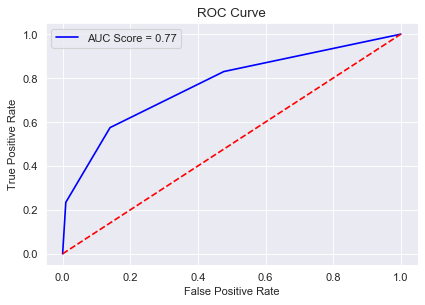

In [61]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
y_pred = knn_model.predict(x_test_std)
y_prob = knn_model.predict_proba(x_test_std)
print("Confusion Matrix for k Nearest Neighbours Classifier model: \n", confusion_matrix(y_test, y_pred))
print("Sensitivity: %.3f" % (confusion_matrix(y_test, y_pred)[0, 0] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 0])).astype(np.float))
print("Specificity: %.3f" % (confusion_matrix(y_test, y_pred)[1, 1] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 1])).astype(np.float))
print("F1 Score for k Nearest Neighbours Classifier Model: %.3f" %f1_score(y_test, y_pred))
print("Log Loss for k Nearest Neighbours Classifier: %.3f" %log_loss(y_test, y_pred))
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob[:, 1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('k Nearest Neighbours: ROC AUC=%.3f' % (lr_auc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(x_test_std)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

### KNN with Normalization

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_norm = KNeighborsClassifier(n_neighbors=3) 
#Using 3 Neighbors just as thumb rule sqrt of observation
knn_model_norm.fit(x_train_norm,y_train_norm)
knn_pred_norm=knn_model_norm.predict(x_test_norm)

Model Validation ==>

Accuracy Score of KNN Model with Normalization::
0.7402597402597403
Confusion Matrix for Normalized k Nearest Neighbours Classifier model: 
 [[88 19]
 [21 26]]
Sensitivity: 0.807
Specificity: 0.578
F1 Score for Normalized k Nearest Neighbours Classifier Model: 0.565
Log Loss for Normalized k Nearest Neighbours Classifier: 8.971
No Skill: ROC AUC=0.500
Normalized k Nearest Neighbours: ROC AUC=0.746

 Classification Report::
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       107
           1       0.58      0.55      0.57        47

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154
 


 ROC Curve


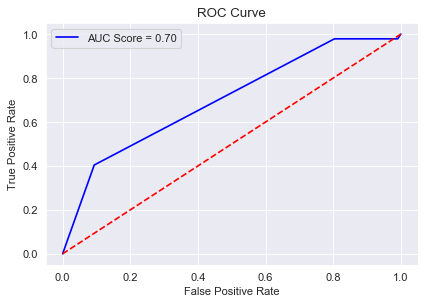

In [63]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model with Normalization::")
print(metrics.accuracy_score(y_test_norm,knn_pred_norm))
y_pred = knn_model_norm.predict(x_test_norm)
y_prob = knn_model_norm.predict_proba(x_test_norm)
print("Confusion Matrix for Normalized k Nearest Neighbours Classifier model: \n", 
      confusion_matrix(y_test, y_pred))
print("Sensitivity: %.3f" % (confusion_matrix(y_test, y_pred)[0, 0] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 0])).astype(np.float))
print("Specificity: %.3f" % (confusion_matrix(y_test, y_pred)[1, 1] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 1])).astype(np.float))
print("F1 Score for Normalized k Nearest Neighbours Classifier Model: %.3f" %f1_score(y_test, y_pred))
print("Log Loss for Normalized k Nearest Neighbours Classifier: %.3f" %log_loss(y_test, y_pred))
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob[:, 1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Normalized k Nearest Neighbours: ROC AUC=%.3f' % (lr_auc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,knn_pred_norm),'\n')
print("\n","ROC Curve")
knn_prob_norm=knn_model.predict_proba(x_test_norm)
knn_prob_norm1=knn_prob_norm[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,knn_prob_norm1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### We can clearly see that KNN with Standardization is better than Normalization as per the AUC Score and Accuracy including other parameters like Specificity and Sensitivity. We'll use standardized train and test for further modelling.

### Support Vector Classifier

#### SVC with Linear Kernel

In [64]:
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 
svc_model_linear.fit(x_train_std,y_train)
svc_pred=svc_model_linear.predict(x_test_std)

Model Validation ==>

Accuracy Score of SVC Model with Linear Kernel::
0.8116883116883117
Confusion Matrix for Support Vector Classifier (Linear Kernel) model: 
 [[98  9]
 [20 27]]
Sensitivity: 0.831
Specificity: 0.750
F1 Score for Support Vector Classifier (Linear Kernel) Model: 0.651
Log Loss for Support Vector Classifier (Linear Kernel): 6.504
No Skill: ROC AUC=0.500
SVC Classifier (Linear Kernel): ROC AUC=0.877

 Classification Report::
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       107
           1       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154
 


 ROC Curve


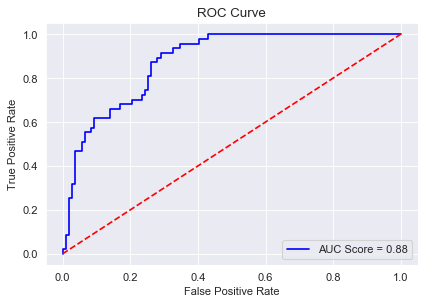

In [65]:
print("Model Validation ==>\n")
print("Accuracy Score of SVC Model with Linear Kernel::")
print(metrics.accuracy_score(y_test,svc_pred))
y_pred = svc_model_linear.predict(x_test_std)
y_prob = svc_model_linear.predict_proba(x_test_std)
print("Confusion Matrix for Support Vector Classifier (Linear Kernel) model: \n", 
      confusion_matrix(y_test, y_pred))
print("Sensitivity: %.3f" % (confusion_matrix(y_test, y_pred)[0, 0] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 0])).astype(np.float))
print("Specificity: %.3f" % (confusion_matrix(y_test, y_pred)[1, 1] /
                             sum(confusion_matrix(y_test, y_pred)[:, 1])).astype(np.float))
print("F1 Score for Support Vector Classifier (Linear Kernel) Model: %.3f" %f1_score(y_test, y_pred))
print("Log Loss for Support Vector Classifier (Linear Kernel): %.3f" %log_loss(y_test, y_pred))
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob[:, 1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC Classifier (Linear Kernel): ROC AUC=%.3f' % (lr_auc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred),'\n')
print("\n","ROC Curve")
svc_prob_linear=svc_model_linear.predict_proba(x_test_std)
svc_prob_linear1=svc_prob_linear[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_linear1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### SVC with RBF Kernel

In [66]:
from sklearn.svm import SVC
svc_model_rbf = SVC(kernel='rbf',random_state=0,probability=True,C=1) 
svc_model_rbf.fit(x_train_std,y_train)
svc_pred_rbf=svc_model_rbf.predict(x_test_std)

Model Validation ==>

Accuracy Score of SVC Model with RBF Kernel::
0.7727272727272727
Confusion Matrix for Support Vector Classifier (RBF Kernel) model: 
 [[94 13]
 [22 25]]
Sensitivity: 0.810
Specificity: 0.658
F1 Score for Support Vector Classifier (RBF Kernel) Model: 0.588
Log Loss for Support Vector Classifier (RBF Kernel): 7.850
No Skill: ROC AUC=0.500
SVC Classifier (RBF Kernel): ROC AUC=0.857

 Classification Report::
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       107
           1       0.66      0.53      0.59        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.76      0.77      0.77       154
 


 ROC Curve


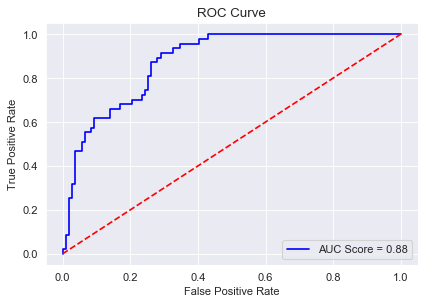

In [67]:
print("Model Validation ==>\n")
print("Accuracy Score of SVC Model with RBF Kernel::")
print(metrics.accuracy_score(y_test,svc_pred_rbf))
y_pred = svc_model_rbf.predict(x_test_std)
y_prob = svc_model_rbf.predict_proba(x_test_std)
print("Confusion Matrix for Support Vector Classifier (RBF Kernel) model: \n",
      confusion_matrix(y_test, y_pred))
print("Sensitivity: %.3f" % (confusion_matrix(y_test, y_pred)[0, 0] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 0])).astype(np.float))
print("Specificity: %.3f" % (confusion_matrix(y_test, y_pred)[1, 1] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 1])).astype(np.float))
print("F1 Score for Support Vector Classifier (RBF Kernel) Model: %.3f" %f1_score(y_test, y_pred))
print("Log Loss for Support Vector Classifier (RBF Kernel): %.3f" %log_loss(y_test, y_pred))
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob[:, 1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC Classifier (RBF Kernel): ROC AUC=%.3f' % (lr_auc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred_rbf),'\n')
print("\n","ROC Curve")
svc_prob_rbf=svc_model_linear.predict_proba(x_test_std)
svc_prob_rbf1=svc_prob_rbf[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_rbf1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**SVC with Linear Kernel is better than RBF Kernel.**
This was actually expected beause variables are somewhat depending linearly with outcome.  
Comparing with KNN both Models are working fine , but SVC Linear with C=0.01 is better in terms of AUC Score and Accuracy Score.

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train_std,y_train)
lr_pred=lr_model.predict(x_test_std)

/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.7922077922077922
Confusion Matrix for Logistic Regression model: 
 [[93 14]
 [18 29]]
Sensitivity: 0.838
Specificity: 0.674
F1 Score for Logistic Regression Model: 0.644
Log Loss for Logistic Regression: 7.177
No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.878

 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154
 


 ROC Curve


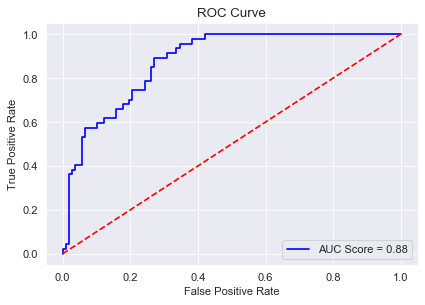

In [69]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,lr_pred))
y_pred = lr_model.predict(x_test_std)
y_prob = lr_model.predict_proba(x_test_std)
print("Confusion Matrix for Logistic Regression model: \n", confusion_matrix(y_test, y_pred))
print("Sensitivity: %.3f" % (confusion_matrix(y_test, y_pred)[0, 0] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 0])).astype(np.float))
print("Specificity: %.3f" % (confusion_matrix(y_test, y_pred)[1, 1] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 1])).astype(np.float))
print("F1 Score for Logistic Regression Model: %.3f" %f1_score(y_test, y_pred))
print("Log Loss for Logistic Regression: %.3f" %log_loss(y_test, y_pred))
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob[:, 1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(x_test_std)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label,lr_model.predict(features))
cm

array([[  0, 500],
       [  0, 268]])

#### AUC Score for both KNN and Logistic Regression is same as `0.88` but accuracy for Logistic Regression is better than KNN

### Ensemble Learning (Random Forest)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000,random_state=0)
rf_model.fit(x_train_std,y_train)
rf_pred=rf_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of Random Forest Model::
0.8246753246753247
Confusion Matrix for Random Forest model: 
 [[93 14]
 [13 34]]
Sensitivity: 0.877
Specificity: 0.708
F1 Score for Random Forest Model: 0.716
Log Loss for Random Forest: 6.056
No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.871

 Classification Report::
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       107
           1       0.71      0.72      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.83      0.82      0.83       154
 


 ROC Curve


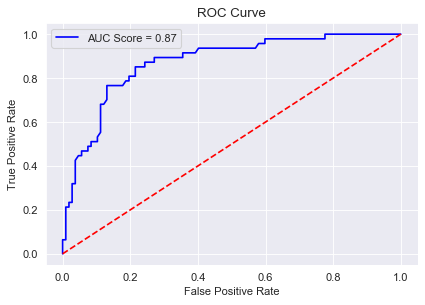

In [72]:
print("Model Validation ==>\n")
print("Accuracy Score of Random Forest Model::")
print(metrics.accuracy_score(y_test,rf_pred))
y_pred = rf_model.predict(x_test_std)
y_prob = rf_model.predict_proba(x_test_std)
print("Confusion Matrix for Random Forest model: \n", confusion_matrix(y_test, y_pred))
print("Sensitivity: %.3f" % (confusion_matrix(y_test, y_pred)[0, 0] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 0])).astype(np.float))
print("Specificity: %.3f" % (confusion_matrix(y_test, y_pred)[1, 1] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 1])).astype(np.float))
print("F1 Score for Random Forest Model: %.3f" %f1_score(y_test, y_pred))
print("Log Loss for Random Forest: %.3f" %log_loss(y_test, y_pred))
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob[:, 1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')
print("\n","ROC Curve")
rf_prob=rf_model.predict_proba(x_test_std)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [73]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(x_train_std,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Model Validation ==>

Accuracy Score of Decision Tree Classifier::
0.8246753246753247
Confusion Matrix for Decision Tree Classifier: 
 [[83 24]
 [12 35]]
Sensitivity: 0.874
Specificity: 0.593
F1 Score for Decision Tree Classifier: 0.660
Log Loss for Decision Tree Classifier: 8.074
No Skill: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.837

 Classification Report::
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       107
           1       0.71      0.72      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.83      0.82      0.83       154
 


 ROC Curve


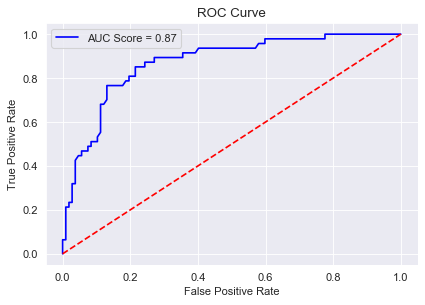

In [74]:
print("Model Validation ==>\n")
print("Accuracy Score of Decision Tree Classifier::")
print(metrics.accuracy_score(y_test,rf_pred))
y_pred = dt_model.predict(x_test_std)
y_prob = dt_model.predict_proba(x_test_std)
print("Confusion Matrix for Decision Tree Classifier: \n", confusion_matrix(y_test, y_pred))
print("Sensitivity: %.3f" % (confusion_matrix(y_test, y_pred)[0, 0] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 0])).astype(np.float))
print("Specificity: %.3f" % (confusion_matrix(y_test, y_pred)[1, 1] / 
                             sum(confusion_matrix(y_test, y_pred)[:, 1])).astype(np.float))
print("F1 Score for Decision Tree Classifier: %.3f" %f1_score(y_test, y_pred))
print("Log Loss for Decision Tree Classifier: %.3f" %log_loss(y_test, y_pred))
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob[:, 1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree Classifier: ROC AUC=%.3f' % (lr_auc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')
print("\n","ROC Curve")
rf_prob=rf_model.predict_proba(x_test_std)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**From above accuracy score we can see that Random Forest is best amongst all. Though AUC Score in case of Random Forest Classifier is less than what we can see for Logistic and SVC, but accuracy for Random Forest Classifies is greater than others, so we can have a trade-off over here.**

### Project Task: Week 4

#### Data Modeling:

**`1`**. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

#### Data Reporting:

**`2`**. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

**`a.`** Pie chart to describe the diabetic or non-diabetic population

**`b.`** Scatter charts between relevant variables to analyze the relationships

**`c.`** Histogram or frequency charts to analyze the distribution of the data

**`d.`** Heatmap of correlation analysis among the relevant variables

**`e.`** Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

We can conclude the following with the model fitting excercise above:
1. Considering the fact that we want to minimise the False Negatives. Sensititvity in our case would mean that the predictions made by our model for the people with diabetes with respect to the total number of persons that have diabetes. This also includes the False Negatives which means the people that have diabetes but are diagnosed as negative. The *Sensitivity or Recall* should be as close to 1 as possible. 
2. Considering the fact that we want to minimise the False Positives. Specificity in our case would mean that the predictions made by our model for the people with no diabetes with respect to the total number of persons that have no diabetes. This also includes the False Positives which means the people that do not have diabetes but are diagnosed as Positive. The *Specificity just like Sensitivity* should be as close to 1 as possible.
3. The F1 score which is the *harmonic mean of the Precision and Recall* should be closer to 1.
4. The AUC Score which measures the capability of the model to distinguish between classes should be as high as possible.

Considering the performance parameters above, we conclude that the **`Random Forest`** is the best classifier for this model.

### Data Reporting

To visualize our data in an effective way, we will export our current data frame to a file which we will use to build effective visualizations.

In [75]:
df_diabetes.to_csv('CleanDiabetesDataset.csv',index=False)

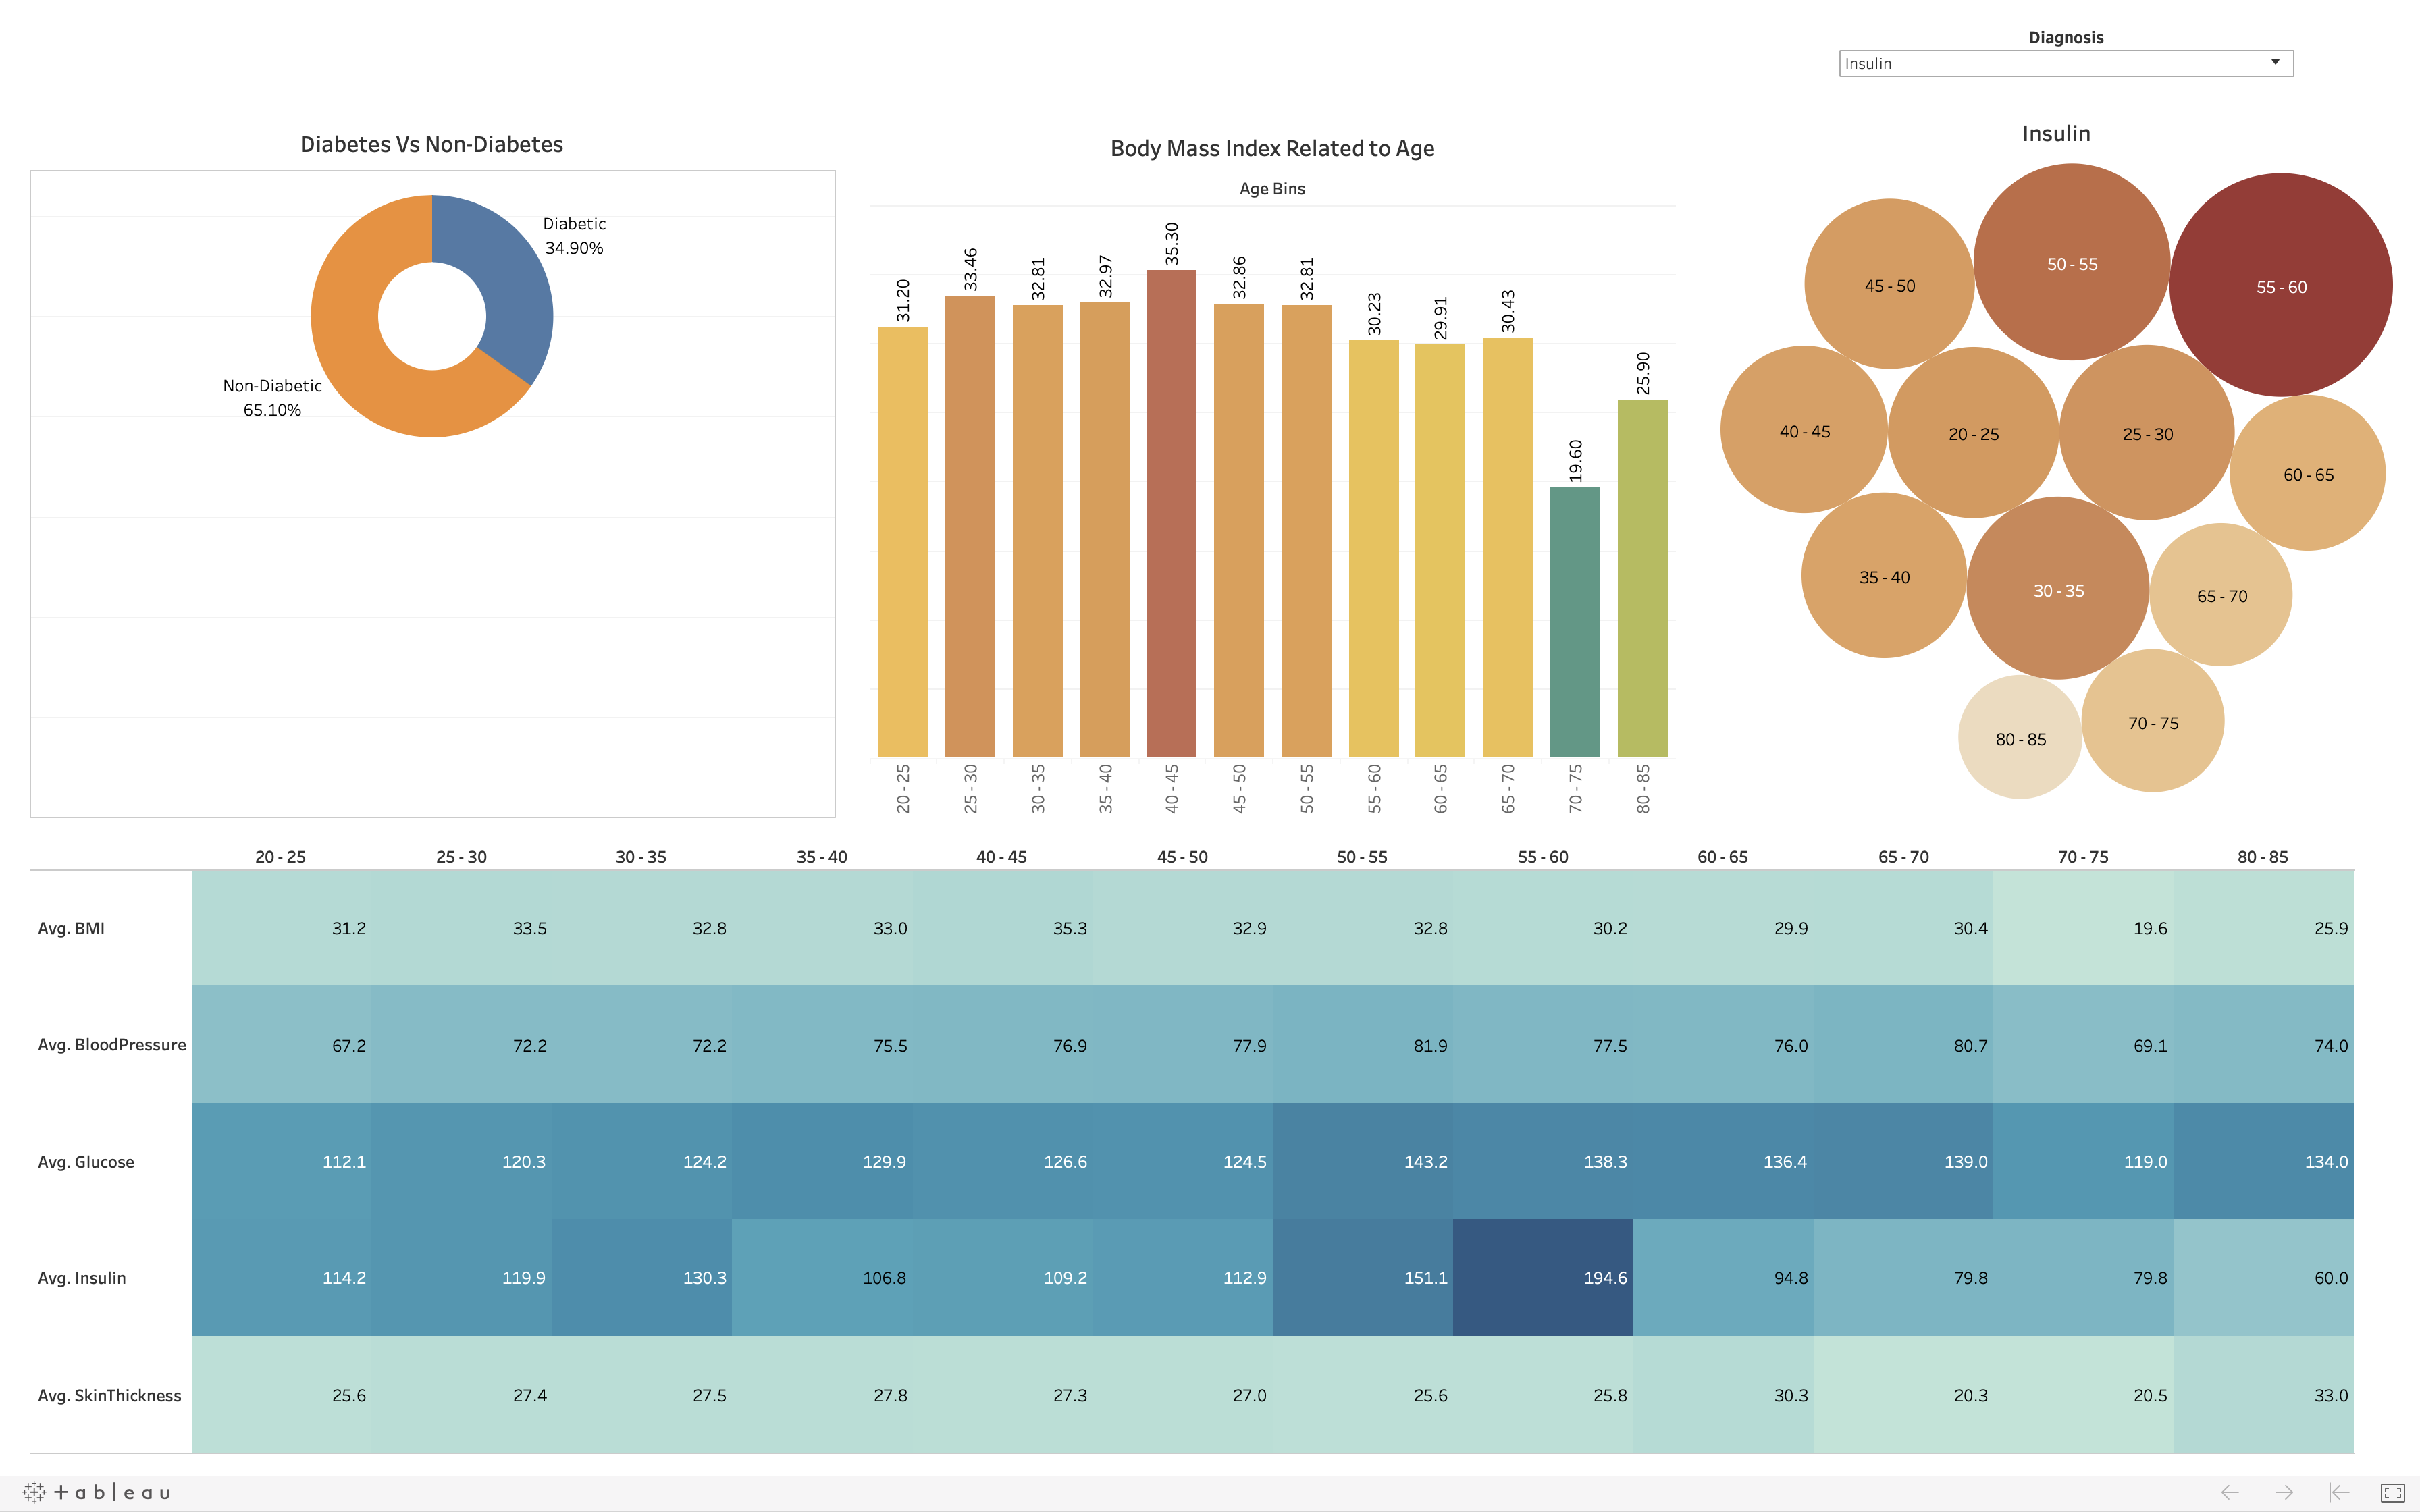

<a href="https://public.tableau.com/views/HealthCareCapstoneProject2/Dashboard?:display_count=y&publish=yes&:origin=viz_share_link">Tableau Public Workbook Link</a>

### END